In [1]:
#MACD
#It is a trend following momentum indicator which is calculated by taking the difference of two moving averages of an 
#asset price (typically 12 period and 26 period MA)

#A signal line is also calculated which is again a moving average (typically 9 period) of the MACD line calculated as per the
#above step

#MACD line cutting the signal line from below signals bullish period and the former cutting the latter from above
#signal bearish period.  This is called a cross over strategy

#Many false positives- espeically during sideway markets

#Suggested that this indicator be used in conjunction with the other indicators

#lagging indicator - trails behind the actual price action 

In [1]:
from pandas_datareader import data as wb
import datetime

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ticker = 'TSLA'
df = wb.DataReader(ticker, data_source = 'yahoo', start = '2011-12-1', end = '2020-7-17')

In [3]:
df1 = df.copy()

In [11]:
def MACD(DF, a, b, c):
    df = DF.copy()
    df['MA_Fast'] = df['Adj Close'].ewm(span = a, min_periods = a).mean()
    df['MA_Slow'] = df['Adj Close'].ewm(span = b, min_periods = b).mean()
    df['MACD'] = df['MA_Fast'] - df['MA_Slow']
    df['Signal'] = df['MACD'].ewm(span = c, min_periods = c).mean()
    df = df.dropna()
    return df

In [18]:
df = MACD(df, 12, 26, 9)

In [13]:
import matplotlib.pyplot as plt

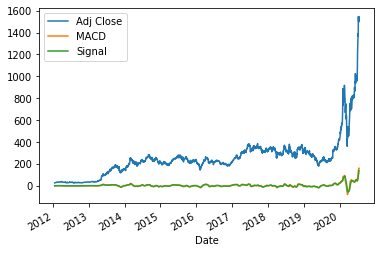

In [19]:
df.iloc[:,[5,8,9]].plot()

In [ ]:
#Bollinger Bands and Average True Range
#Both Bollinger Bands and ATR are volatility based indicators

#Bollinger Band comprises of two lines plotted n (n is typiecally 2) standard deviations from a m period simple
#moving average line (m is typically 20); The bands widen during periods of increased volatilty and shrink during 
#period of reduced volatility

#The ATR takes in account the market movement each day in either direction and averaging them out. It focuses on 
#total price movement and conveys how wildly the market is swining as it moves

#Traders typically use them in conjunction as they approach volatilty differently and are compimentary

In [20]:
def ATR(DF, n):
    #function to calculate true range and average true range 
    df = DF.copy()
    df['H-L'] = abs(df['High'] - df['Low'])
    df['H-PC'] = abs(df['High'] - df['Adj Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Adj Close'].shift(1))
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis = 1, skipna = False)
    #simple mean 
    df['ATR']  = df['TR'].rolling(n).mean()
    #exponential mean
    #df['ATR'] = df['TR'].ewm(span-n, adjust = False, min_periods = n).mean()
    df2 = df.drop(['H-L','H-PC', 'L-PC'], axis = 1)
    return df2

In [21]:
#Average True range 
ATR(df, 20)

,High,Low,Open,Close,Volume,Adj Close,MA_Fast,MA_Slow,MACD,Signal,TR,ATR
Date,,,,,,,,,,,,
2012-01-20,27.000000,26.400000,26.900000,26.600000,662300,26.600000,26.933982,27.588796,-0.654814,-0.662382,NaN,NaN
2012-01-23,27.209999,26.600000,26.809999,26.770000,594600,26.770000,26.908681,27.523745,-0.615064,-0.651780,0.609999,NaN
2012-01-24,27.680000,26.440001,26.629999,27.420000,858000,27.420000,26.987538,27.515547,-0.528009,-0.624700,1.240000,NaN
2012-01-25,28.010000,27.049999,27.270000,27.969999,611200,27.969999,27.138999,27.551282,-0.412283,-0.579082,0.960001,NaN
2012-01-26,29.580000,28.000000,28.070000,28.940001,1271100,28.940001,27.416562,27.659987,-0.243424,-0.508045,1.610001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13,1794.989990,1471.109985,1659.000000,1497.060059,38985400,1497.060059,1295.900228,1145.748082,150.152145,108.410271,323.880005,81.071497
2020-07-14,1590.000000,1431.000000,1556.000000,1516.800049,23418100,1516.800049,1329.884815,1173.233413,156.651402,118.058497,159.000000,84.504495
2020-07-15,1550.000000,1457.000000,1543.000000,1546.010010,16367800,1546.010010,1363.134845,1200.846494,162.288351,126.904468,93.000000,86.629996


In [28]:
def BollBnd(DF, n):
    #function to calculate bollinger band 
    df = DF.copy()
    df['MA'] = df['Adj Close'].rolling(n).mean()
    df['BB_up'] = df['MA'] + 2 * df['MA'].rolling(n).std()
    df['BB_dn'] = df['MA'] - 2 * df['MA'].rolling(n).std()
    df['BB_width'] = df['BB_up'] - df['BB_dn']
    df = df.dropna()
    return df

In [29]:
bollinger = BollBnd(df,20)

In [30]:
bollinger

,High,Low,Open,Close,Volume,Adj Close,MA,BB_up,BB_dn,BB_width
Date,,,,,,,,,,
2012-01-27,29.719999,28.500000,28.500000,29.330000,748400,29.330000,27.422500,29.219343,25.625657,3.593686
2012-01-30,29.610001,28.530001,29.490000,29.570000,729000,29.570000,27.464500,29.048074,25.880926,3.167148
2012-01-31,30.000000,28.870001,29.900000,29.070000,956400,29.070000,27.490000,28.837230,26.142770,2.694461
2012-02-01,29.700001,29.000000,29.070000,29.580000,523200,29.580000,27.565000,28.663597,26.466403,2.197195
2012-02-02,30.879999,29.610001,29.719999,30.250000,805700,30.250000,27.692000,28.556560,26.827440,1.729120
...,...,...,...,...,...,...,...,...,...,...
2020-07-13,1794.989990,1471.109985,1659.000000,1497.060059,38985400,1497.060059,1142.655508,1297.706238,987.604779,310.101458
2020-07-14,1590.000000,1431.000000,1556.000000,1516.800049,23418100,1516.800049,1168.950510,1338.197285,999.703735,338.493550
2020-07-15,1550.000000,1457.000000,1543.000000,1546.010010,16367800,1546.010010,1197.144510,1381.528680,1012.760340,368.768340


In [26]:
import plotly.graph_objects as go

In [42]:
#visulize using plotly to see how well we did
fig = go.Figure()

fig = go.Figure(data=[go.Candlestick(x = bollinger.index,
                                     open = bollinger['Open'],
                                     high = bollinger['High'],
                                     low = bollinger['Low'],
                                     showlegend = False,
                                     close = bollinger['Adj Close'])])

fig.add_trace(go.Scatter(x=bollinger.index, y=bollinger['MA'], name="Moving Average",
                     line_color='lightblue', mode='lines',
        line={'dash': 'dash'}, marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))
fig.add_trace(go.Scatter(x=bollinger.index, y=bollinger['BB_up'], name="Bollinger Upper Band",
                     line_color='silver', mode='lines',
        line={'dash': 'dash'}, marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))
fig.add_trace(go.Scatter(x=bollinger.index, y=bollinger['BB_dn'], name="Bollinger Lower Band",
                     line_color='gray', mode='lines',
        line={'dash': 'dash'}, marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

fig.update_layout(title_text='Tesla Bollinger Band Width', width=1000,
                height=600, xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
#RSI -Relative Strength Index

#RSI is a momentum oscillator which measures the speed and change of price movements

#RSI value oscillates between 0 and 100 with values above 70 indicating that the asset has now reached overbought territory
#Values below 30 signify oversold territory

#Assets can remain in overbought and oversold territories for long durations

#Calculations follows a two step method wherein the second step acts as a smoothening technique
#(similar to calculating exponential MA).



In [27]:
import numpy as np

In [28]:
def RSI(DF,n):
    "function to calculate RSI"
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df['RSI']

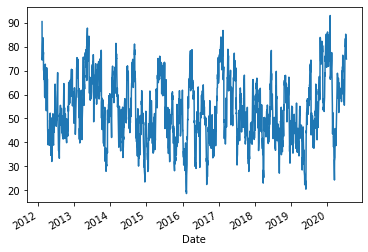

In [29]:
RSI(df,14).plot()

In [30]:
# Calculating RSI without using loop
def rsi(df, n):
    "function to calculate RSI"
    delta = df["Adj Close"].diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n-1]] = np.mean( u[:n]) # first value is average of gains
    u = u.drop(u.index[:(n-1)])
    d[d.index[n-1]] = np.mean( d[:n]) # first value is average of losses
    d = d.drop(d.index[:(n-1)])
    rs = u.ewm(com=n,min_periods=n).mean()/d.ewm(com=n,min_periods=n).mean()
    return 100 - 100 / (1+rs)

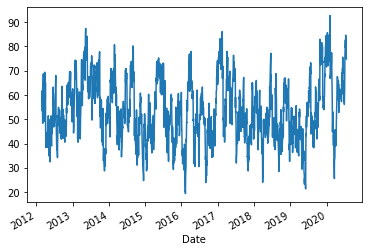

In [31]:
rsi(df,14).plot()

In [32]:
#ADX Average Directional Index

#ADX is a way of measuring the strength of a trend

#Values range from 0 to 100 and quantifies the strength of a trend as per below
#0-25 Absent or weak trend
#25-50 Strong Trend
#50-75 Very Strong Trend
#75-100 Extremely Strong Trend

#ADX is non directional meaning the ADX value makes no inference about the direction of the trend
#but only the strength of the trend

#The calculation involves finding both positive and negative directional movement by comparing successive highs 
#and successive lows and then calculating the smoothed average of the difference of these 


In [33]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2




In [34]:
def ADX(DF,n):
    "function to calculate ADX"
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2['ADX']

In [ ]:
#Renko Chart
#Renko Chart is built using price movement and not price against standard time intervals
#This filters out noise and lets you visualize the true trend

#Price movements (fixed) are represented as bricks stacked at 45 degrees to each other
# A new brick is added to the chart only when the price moves by a predetermined amount in either direction

#Renko charts have a time axis, but the time scale is not fixed.  Some bricks may take longer to form than others
#depending on how long it takes the price to move the required box size 

#Renko Charts typically use ony closing price based on the chart time frame chosen 

In [5]:
!pip3 install stocktrends

  Using cached https://files.pythonhosted.org/packages/a0/3b/74c7d26354cf3bddbe3c9a3db1b71268148b1273a1d607758e7b5012884e/stocktrends-0.1.4.tar.gz
  Stored in directory: /Users/justin/Library/Caches/pip/wheels/6c/8e/1a/52e078e2d21247e7c88b05a914fb70e861f215c1475ba699a1
Successfully built stocktrends
You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
from stocktrends import Renko

In [49]:
ticker = 'TSLA'
df10 = wb.DataReader(ticker, data_source = 'yahoo', start = '2011-12-1', end= '2020-7-20')

In [57]:
ticker = 'TSLA'
df20 = wb.DataReader(ticker, data_source = 'yahoo', start = '2011-12-1', end= '2020-7-20')

In [50]:
df10 = df10.reset_index()
df10.columns = map(str.lower, df10.columns)

In [54]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [59]:
AverageTrueRange = ATR(df20, 120)

In [62]:
AverageTrueRange['ATR'].tail(100)

Date
2020-02-27    23.591664
2020-02-28    24.212748
2020-03-02    24.790998
2020-03-03    25.493248
2020-03-04    25.736248
                ...    
2020-07-14    60.010582
2020-07-15    60.565582
2020-07-16    61.068999
2020-07-17    61.252082
2020-07-20    62.445499
Name: ATR, Length: 100, dtype: float64

In [52]:
renko_df = Renko(df10)

In [63]:
renko_df.brick_size = 50

In [65]:
df100 = renko_df.get_ohlc_data()

In [66]:
df100

,date,open,high,low,close,uptrend
0,2011-12-01,-50.0,0.0,-50.0,0.0,True
1,2013-04-22,0.0,50.0,0.0,50.0,True
2,2013-05-28,50.0,100.0,50.0,100.0,True
3,2013-08-08,100.0,150.0,100.0,150.0,True
4,2014-02-18,150.0,200.0,150.0,200.0,True
5,2014-02-26,200.0,250.0,200.0,250.0,True
6,2016-02-08,200.0,200.0,150.0,150.0,False
7,2016-04-05,200.0,250.0,200.0,250.0,True
8,2017-04-04,250.0,300.0,250.0,300.0,True
9,2017-06-06,300.0,350.0,300.0,350.0,True


In [9]:




def renko_DF(DF):
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,5,6]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df




In [10]:
renko_data = renko_DF(df)

In [23]:
renko_data

,date,open,high,low,close,uptrend
0,2011-12-01,-61.0,0.0,-61.0,0.0,True
1,2013-05-09,0.0,61.0,0.0,61.0,True
2,2013-07-09,61.0,122.0,61.0,122.0,True
3,2013-09-20,122.0,183.0,122.0,183.0,True
4,2014-02-25,183.0,244.0,183.0,244.0,True
5,2017-04-10,244.0,305.0,244.0,305.0,True
6,2017-06-08,305.0,366.0,305.0,366.0,True
7,2019-04-26,305.0,305.0,244.0,244.0,False
8,2019-06-03,244.0,244.0,183.0,183.0,False
9,2019-10-25,244.0,305.0,244.0,305.0,True


In [21]:
df1 = df.reset_index()
df1 = df1.rename(columns = {'High':'high', 'Open':'open', 'Low':'low', 'Close':'close', 'Date':'date'})


In [ ]:
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from stocktrends import Renko



In [101]:
ticker = 'TSLA'
df30 = wb.DataReader(ticker, data_source = 'yahoo', start = '2018-12-1', end= '2020-7-20')

In [104]:
!pip3 install TAcharts

  Using cached https://files.pythonhosted.org/packages/c2/6c/7099604509f8012de8e7eba57a3b2ae1823d95641eb3d518316ab07b1c9d/TAcharts-0.0.25-py3-none-any.whl
You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [106]:
df30 = df30.reset_index()
df30.columns = map(str.lower, df30.columns)

In [108]:
from TAcharts.indicators.renko import Renko

r = Renko(df30)
r.set_brick_size(auto=True)
r.build()

r.plot()

ValueError: Length of passed values is 409, index implies 408.

In [93]:
df30 = df30.reset_index()
df30.columns = map(str.lower, df30.columns)

In [94]:
df30

,date,high,low,open,close,volume,adj close
0,2018-12-03,366.000000,352.000000,360.000000,358.489990,8306500,358.489990
1,2018-12-04,368.679993,352.000000,356.049988,359.700012,8461900,359.700012
2,2018-12-06,367.380005,350.760010,356.010010,363.059998,7842500,363.059998
3,2018-12-07,379.489990,357.649994,369.000000,357.970001,11511200,357.970001
4,2018-12-10,365.980011,353.119995,360.000000,365.149994,6613500,365.149994
...,...,...,...,...,...,...,...
404,2020-07-14,1590.000000,1431.000000,1556.000000,1516.800049,23418100,1516.800049
405,2020-07-15,1550.000000,1457.000000,1543.000000,1546.010010,16367800,1546.010010
406,2020-07-16,1531.709961,1466.000000,1477.160034,1500.640015,14300800,1500.640015
407,2020-07-17,1537.510010,1490.000000,1513.449951,1500.839966,9304700,1500.839966


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

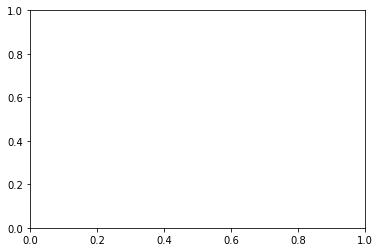

In [97]:
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt


brick_size = 2


def plot_renko(data, brick_size):
    fig = plt.figure(1)
    fig.clf()
    axes = fig.gca()
    y_max = max(data)

    prev_num = 0

    bricks = []

    for delta in data:
        if delta > 0:
            bricks.extend([1]*delta)
        else:
            bricks.extend([-1]*abs(delta))

    for index, number in enumerate(bricks):
        if number == 1:
            facecolor='green'
        else:
            facecolor='red'

        prev_num += number

        renko = Rectangle(
            (index, prev_num * brick_size), 1, brick_size,
            facecolor=facecolor, alpha=0.5
        )
        axes.add_patch(renko)

    plt.show()


#df = pd.read_csv(file)

df30['cdiff'] = df30['close'] - df30['close'].shift(1)
df30.dropna(inplace=True)
df30['bricks'] = df30.loc[:, ('cdiff', )] / brick_size

bricks = df30[df30['bricks'] != 0]['bricks'].values
plot_renko(bricks, brick_size)

In [86]:
renko = Renko(df30)
# 
# 
# print(data.tail())

In [87]:
renko

In [83]:
renko.brick_size = 2

In [85]:
renko

In [84]:
data = renko.get_ohlc_data()

KeyError: 0

In [88]:

brick_size = 2


def plot_renko(data, brick_size):
    fig = plt.figure(1)
    fig.clf()
    axes = fig.gca()
    y_max = max(data)

    prev_num = 0

    bricks = []

    for delta in data:
        if delta > 0:
            bricks.extend([1]*delta)
        else:
            bricks.extend([-1]*abs(delta))

    for index, number in enumerate(bricks):
        if number == 1:
            facecolor='green'
        else:
            facecolor='red'

        prev_num += number

        renko = Rectangle(
            (index, prev_num * brick_size), 1, brick_size,
            facecolor=facecolor, alpha=0.5
        )
        axes.add_patch(renko)

    plt.show()

In [89]:
df30['cdiff'] = df30['close'] - df30['close'].shift(1)
df30.dropna(inplace=True)
df30['bricks'] = df30.loc[:, ('cdiff', )] / brick_size

In [90]:
df30

,date,high,low,open,close,volume,adj close,cdiff,bricks
3,2018-12-07,379.489990,357.649994,369.000000,357.970001,11511200,357.970001,-5.089996,-2.544998
4,2018-12-10,365.980011,353.119995,360.000000,365.149994,6613500,365.149994,7.179993,3.589996
5,2018-12-11,372.170013,360.230011,369.910004,366.760010,6308800,366.760010,1.610016,0.805008
6,2018-12-12,371.910004,365.160004,369.420013,366.600006,5027000,366.600006,-0.160004,-0.080002
7,2018-12-13,377.440002,366.750000,370.149994,376.790009,7365900,376.790009,10.190002,5.095001
...,...,...,...,...,...,...,...,...,...
404,2020-07-14,1590.000000,1431.000000,1556.000000,1516.800049,23418100,1516.800049,19.739990,9.869995
405,2020-07-15,1550.000000,1457.000000,1543.000000,1546.010010,16367800,1546.010010,29.209961,14.604980
406,2020-07-16,1531.709961,1466.000000,1477.160034,1500.640015,14300800,1500.640015,-45.369995,-22.684998
407,2020-07-17,1537.510010,1490.000000,1513.449951,1500.839966,9304700,1500.839966,0.199951,0.099976


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

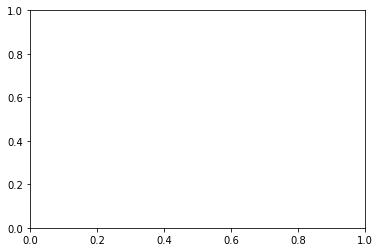

In [91]:


bricks = df10[df10['bricks'] != 0]['bricks'].values
plot_renko(bricks, brick_size)

In [99]:
base_up = []
base_dn = []
 
def renko_live(ltp):
    global base_up, base_dn
    brick = 4
    if len(base_up) == 0:
        base_up = [ltp]
    if len(base_dn) == 0:
        base_dn = [ltp - brick]
    bars = []
    if ltp >= base_up[-1]:
        diff = ltp - base_up[-1]
        bars.append(int(diff/brick))
        base_up.append(base_up[-1] + bars[-1]*brick)
        base_dn.append(base_up[-1] - brick)
    elif base_dn[-1] < ltp < base_up[-1]:
        bars.append(0)
        base_up.append(base_up[-1] + bars[-1]*brick)
        base_dn.append(base_up[-1] - brick)
    elif ltp <= base_dn[-1]:
        diff = ltp - base_dn[-1]
        bars.append(int(diff/brick))
        base_up.append(base_up[-1] + bars[-1]*brick)
        base_dn.append(base_up[-1] - brick)
    if len(base_up) > 20:
        del base_up[0]
    if len(base_dn) > 20:
        del base_dn[0]
    return bars[-1]

In [100]:
renko_live(df30)

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
def PlotRenko(filename):
    # Turn interactive mode off
    <span class="skimlinks-unlinked">plt.ioff</span>()
    df = pd.read_csv(filename, parse_dates=[['date','time']])
 
    # number of bars to display in the plot
    num_bars = 100
 
    # get the last num_bars
    df = <span class="skimlinks-unlinked">df.tail(num_bars</span>)
    renkos = zip(df['open'],df['close'])
 
    # compute the price movement in the Renko
    price_move = abs(<span class="skimlinks-unlinked">df.iloc</span>[1]['open'] - <span class="skimlinks-unlinked">df.iloc</span>[1]['close'])
 
    # create the figure
    fig = plt.figure(1)
    <span class="skimlinks-unlinked">fig.clf</span>()
    axes = <span class="skimlinks-unlinked">fig.gca</span>()
 
    # plot the bars, blue for 'up', red for 'down'
    index = 1
    for open_price, close_price in renkos:
        if (open_price < close_price):
            renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='darkblue', facecolor='blue', alpha=0.5)
            axes.add_patch(renko)
        else:
            renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='darkred', facecolor='red', alpha=0.5)
            axes.add_patch(renko)
        index = index + 1
 
    # adjust the axes
    <span class="skimlinks-unlinked">plt.xlim</span>([0, num_bars])
    <span class="skimlinks-unlinked">plt.ylim</span>([min(min(df['open']),min(df['close'])), max(max(df['open']),max(df['close']))])
    fig.suptitle('Bars from ' + min(df['date_time']).strftime("%d-%b-%Y %H:%M") + " to " + max(df['date_time']).strftime("%d-%b-%Y %H:%M") \
        + '\nPrice movement = ' + str(price_move), fontsize=14)
    plt.xlabel('Bar Number')
    plt.ylabel('Price')
    <span class="skimlinks-unlinked">plt.grid(True</span>)
    <span class="skimlinks-unlinked">plt.show</span>()

In [ ]:
#OBV (On Balance Volume)

#OBV is a momentum indicator which uses changes in trading volume as an idicator of future asset price moves
#